# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

## BEGIN
Place your ID ("numero di matricola") that will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain here why you have changed it.

In [3]:
ID = 2057061
np.random.seed(ID)

Now we load the dataset using the function above.

In [4]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test

permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

#check if there are at least 10 samples of each class in the training set

flag = False
counter = 0
while flag is False:
    for i in range(10):
        if np.sum(y_train == i) >= 10:
            counter = counter + 1
    if counter == 10:
        flag = True
        break
    
print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([42, 54, 57, 63, 40, 57, 47, 52, 54, 34]))

The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


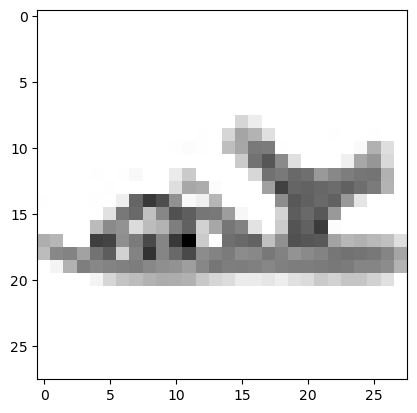

LABEL: 5
INPUT:


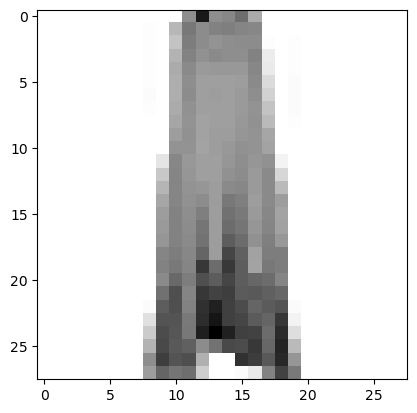

LABEL: 3
INPUT:


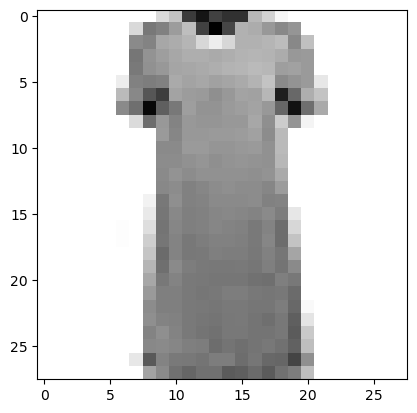

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

### TO DO 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn, and verbose=True allows you to see how loss changes in iterations (note that the loss used by the MLPClassifier may be different from the 0-1 loss, also called accuracy).

Then, using the default activation function, we consider four architectures, with different numbers of hidden layers and different sizes. To evaluate the architectures we use the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture.


In [8]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_cv = GridSearchCV(MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID), hl_parameters, cv=5)
    
mlp_cv.fit(X_train, y_train)

Iteration 1, loss = 2.26330981
Iteration 2, loss = 2.00087771
Iteration 3, loss = 1.75201643
Iteration 4, loss = 1.51765951
Iteration 5, loss = 1.29714630
Iteration 6, loss = 1.37914770
Iteration 7, loss = 0.99659498
Iteration 8, loss = 0.94687289
Iteration 9, loss = 0.77315135
Iteration 10, loss = 0.74374985
Iteration 11, loss = 0.94261020
Iteration 12, loss = 0.77516770
Iteration 13, loss = 0.64850385
Iteration 14, loss = 0.56879901
Iteration 15, loss = 0.53370291
Iteration 16, loss = 0.51967986
Iteration 17, loss = 0.56951626
Iteration 18, loss = 0.53338103
Iteration 19, loss = 0.47116654
Iteration 20, loss = 0.45064852
Iteration 21, loss = 0.46760855
Iteration 22, loss = 0.43526915
Iteration 23, loss = 0.39182149
Iteration 24, loss = 0.37965889
Iteration 25, loss = 0.39253530
Iteration 26, loss = 0.35650184
Iteration 27, loss = 0.39482372
Iteration 28, loss = 0.33029194
Iteration 29, loss = 0.37463987
Iteration 30, loss = 0.33647261
Iteration 31, loss = 0.30144413
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(learning_rate_init=0.1, max_iter=300,
                                     random_state=2057061, solver='sgd',
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [9]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_cv.best_params_)

print("")

print("Score with best parameters:")
print(mlp_cv.best_score_)

print("\nAll scores on the grid:")
print(mlp_cv.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50, 50)}

Score with best parameters:
0.8080000000000002

All scores on the grid:
[0.768 0.78  0.446 0.808]


## TO DO 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

Apparently, looking at the results coming from the GridSearch algorithm, the best architectures are the networks with 1 or 2 hidden layers made by 50 neurons each. This can be explained by the fact that the dataset is not a really basic one: we have 10 classes we can classify our elements into, and having 300 iterations doesn't really give our smaller networks enough chances to develop a good accuracy.

## Training and Test Error

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above. Use the attribute *best_estimator_* to pick the best architecture already re-trained on the training dataset (more infos in the documentation of GridSearchCV).

In [10]:
#get training and test error for the best NN model from CV

mlp = mlp_cv.best_estimator_

training_error = 1 - mlp.score(X_train, y_train)

test_error = 1 - mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.208992


## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before.

In [11]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

#just for courtesy

flag = False
counter = 0
while flag is False:
    for i in range(10):
        if np.sum(y_train == i) >= 10:
            counter = counter + 1
    if counter == 10:
        flag = True
        break

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1054,  945, 1010,  986, 1008,  974,  948, 1026, 1027, 1022]))

## TO DO 4

Now train the NNs with the added data points. This time you can run for 100 iterations if you cannot run for 300 iterations.

In [12]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_large_cv = GridSearchCV(MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, verbose=True, random_state=ID), hl_parameters, cv=5)

mlp_large_cv.fit(X_train, y_train)

Iteration 1, loss = 1.25400804
Iteration 2, loss = 0.72156235
Iteration 3, loss = 0.62429493
Iteration 4, loss = 0.58269460
Iteration 5, loss = 0.54628531
Iteration 6, loss = 0.51479242
Iteration 7, loss = 0.49865005
Iteration 8, loss = 0.48236893
Iteration 9, loss = 0.47616361
Iteration 10, loss = 0.46336734
Iteration 11, loss = 0.45320155
Iteration 12, loss = 0.43700737
Iteration 13, loss = 0.43564372
Iteration 14, loss = 0.42771363
Iteration 15, loss = 0.43118213
Iteration 16, loss = 0.41261216
Iteration 17, loss = 0.41489553
Iteration 18, loss = 0.40876578
Iteration 19, loss = 0.40366480
Iteration 20, loss = 0.39618927
Iteration 21, loss = 0.38643776
Iteration 22, loss = 0.38399882
Iteration 23, loss = 0.37863713
Iteration 24, loss = 0.38926818
Iteration 25, loss = 0.38054786
Iteration 26, loss = 0.37766520
Iteration 27, loss = 0.38164566
Iteration 28, loss = 0.36203042
Iteration 29, loss = 0.38869596
Iteration 30, loss = 0.35579063
Iteration 31, loss = 0.36750005
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(learning_rate_init=0.1, max_iter=300,
                                     random_state=2057061, solver='sgd',
                                     verbose=True),
             param_grid={'hidden_layer_sizes': [(10,), (50,), (10, 10),
                                                (50, 50)]})

In [13]:
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_large_cv.best_params_)

print("Score with best parameters:")
print(mlp_large_cv.best_score_)

print("\nAll scores on the grid:")
print(mlp_large_cv.cv_results_['mean_test_score'])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.8457000000000001

All scores on the grid:
[0.7981 0.8457 0.751  0.84  ]


## TO DO 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

Just like in the previous situation, the 50 neurons architectures are performing better. In this case, however, the single layer network is performing slightly better than the two layers one. One idea on why this could be happening is overfitting: it could be possible that the bigger architecture is overfitting on the training set hence decreasing its score. Once again, the results are actually really, really close to each other, so either models could be used. 

## TO DO 6

Get the train and test error for the best NN you obtained with 10000 points. 

In [14]:
#get training and test error for the best NN model from CV

best_mlp_large = mlp_large_cv.best_estimator_

training_error = 1 - best_mlp_large.score(X_train, y_train)

test_error = 1 - best_mlp_large.score(X_test, y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.011700
Best NN test error: 0.147760


## TO DO 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

We now are working with a much bigger portion of the dataset, meaning that reaching that sweet training_error = 0 is going to be basically infeasible (or we'll end up overfitting a lot). As for what happens in this case, which is usually what happens when we train the same models on a bigger dataset, we have a slightly bigger training_error (which is normal) and a smaller test error than what was produced by the previous architecture, when the training_set size was 500.

## TO DO 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

INPUT:


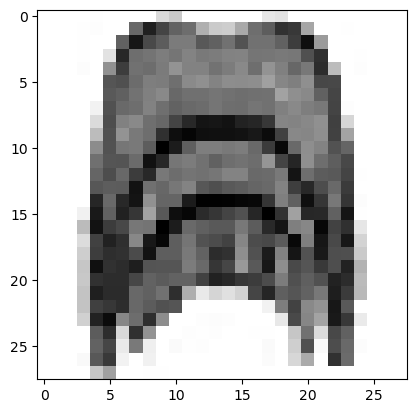

LABEL: 2
Predicted label by mlp: 6
Predicted label by best_mlp_large: 2


In [15]:
#plot an element missclassified by the mlp model but correctly classified by the best_mlp_large model

y_pred = mlp.predict(X_test)
y_pred_large = best_mlp_large.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i] != y_test[i] and y_pred_large[i] == y_test[i]:
        plot_input(X_test, y_test, i)
        print("Predicted label by mlp: %i"%y_pred[i])
        print("Predicted label by best_mlp_large: %i"%y_pred_large[i])
        break


Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


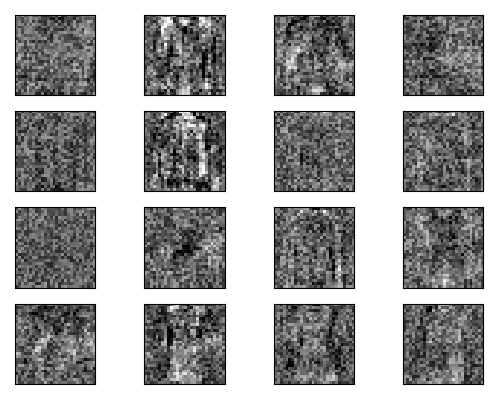

Weights with 10000 data points:


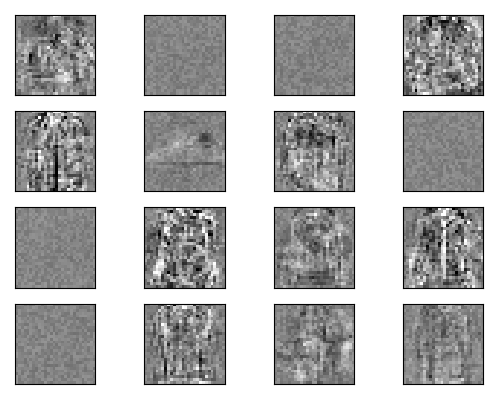

In [16]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## TO DO 9

Describe what do you observe by looking at the weights.

The weights of the second model tend to a more uniform sort-of-grey color, and we can imagine this happens as the bigger dataset has allowed the model to learn more robust and generalizable features which leads to more consistent weights. The first model has more noise as it was trained on a smaller dataset and it was not able to learn as accurately (and to stabilize) the weights.

## TO DO 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**As we have seen in the previous homework, I choose an SVM model and by keeping the same choice of parameters as last time I will now perform the GridSearch in order to obtain the best configuration and then compare it to the best MLP network**

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

proc = GridSearchCV(linear_SVM, parameters, cv=5)
proc.fit(X_train, y_train)

print("RESULTS FOR LINEAR MODEL:")

print("Best parameters set found:")
print(proc.best_params_)

print("Score with best parameters:")
print(proc.best_score_)

print("\nAll scores on the grid:")
means = proc.cv_results_['mean_test_score']
print(means)

# parameters for poly with degree 2 kernel
parameters2 = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

proc2 = GridSearchCV(poly2_SVM, parameters2, cv=5)
proc2.fit(X_train, y_train)


print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
print(proc2.best_params_)

print("Score with best parameters:")
print(proc2.best_score_)

print("\nAll scores on the grid:")
means = proc2.cv_results_['mean_test_score']
print(means)

# parameters for rbf SVM
parameters3 = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
#find best model using 5-fold CV 
#and train it using all the training data

proc3 = GridSearchCV(rbf_SVM, parameters3, cv=5)
proc3.fit(X_train, y_train)

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
print(proc3.best_params_)

print("Score with best parameters:")
print(proc3.best_score_)

print("\nAll scores on the grid:")
means = proc3.cv_results_['mean_test_score']
print(means)

RESULTS FOR LINEAR MODEL:
Best parameters set found:
{'C': 1}
Score with best parameters:
0.8292000000000002

All scores on the grid:
[0.8292 0.8067 0.798 ]

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8554999999999999

All scores on the grid:
[0.8359 0.8443 0.8431 0.8555 0.8429 0.8431 0.8443 0.8431 0.8431]

RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8741

All scores on the grid:
[0.8578 0.8027 0.1097 0.8741 0.8108 0.1164 0.8647 0.8108 0.1164]


In [18]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel='rbf')

# fit the model on the entire training set
best_SVM.fit(X_train, y_train)

training_error_other = 1. - best_SVM.score(X_train, y_train)

test_error_other = 1. - best_SVM.score(X_test, y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')

print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.100500
Best test error (other model): 0.136120


## TO DO 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

The results that came with the SVM model are slightly better than what was produced by the Neural Network, and this can make sense as the SVM with kbf kernel is a more complex model than the MLP, and it is perfectly suited for MultiClass classification of elements that are not linearly separable. At the same time, it takes A LOT of time (~20/25 minutes) for the GridSearch algorithm to find the best SVM model (and the upgrade in performance is only so limited), so as for the quickness of the model MLP would be the best choice (a few minutes of running time).

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [19]:
#load the required packages

from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [20]:
#let's consider only 2000 data points

X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## TO DO 12
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [21]:
kmeans = KMeans(n_clusters=10, n_init= 10, random_state=ID).fit(X_train)
#print the centroids
print(kmeans.cluster_centers_)

[[ 0.00000000e+00  0.00000000e+00  9.95953937e-05 ...  2.16370993e-02
   3.83442266e-03  9.95953937e-04]
 [ 0.00000000e+00 -6.77626358e-21 -1.35525272e-20 ...  0.00000000e+00
   0.00000000e+00  1.08420217e-19]
 [ 0.00000000e+00  5.60224090e-04  5.60224090e-04 ...  6.30065359e-02
   2.40896359e-02  2.42763772e-03]
 ...
 [ 0.00000000e+00  6.77626358e-21  1.35525272e-20 ...  2.64806954e-02
   1.12795634e-02  1.21285628e-04]
 [ 0.00000000e+00  1.35525272e-20  1.35525272e-20 ...  2.00080032e-04
   4.00160064e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.35525272e-20 ... -1.73472348e-18
   0.00000000e+00  5.42101086e-20]]


## Comparison of clusters with true labels

## TO DO 13
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [22]:
#compute the contingency matrix
contingency_matrix = metrics.cluster.contingency_matrix(y_train, kmeans.labels_)
print(contingency_matrix)

[[  8   1   0  54   4  97  17   0   2   0]
 [  3   0   0   5 201   7   6   0   0   0]
 [105   0   0  52   0   6  22   2   1   0]
 [  3   0   0  10 111  67  17   0   0   0]
 [139   0   0  28   4  29  16   2   0   0]
 [  0  47  10   0   0   0 123   0   0  15]
 [ 48   2   0  68   1  32  37   0   2   0]
 [  0 132   0   0   0   0  14   0   0  21]
 [  9   9   0   4   2   2  18  93  93   0]
 [  0   2  95   1   0   0   4   0   0  97]]


## TO DO 14
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.

As we can see from the contingency matrix, if the kmeans labels were actually correct (with respect to the y_train elements) we'd have an higher value on the diagonal. The reason why this doesn't happen could be for a multitude of reasons:
- the amount of data we have is not enough to really show the similarities between elements belonging to the same cluster and their difference from the elements belonging to other clusters;
- the number of centroids (10) could be a limitation: maybe running the model with more centroid could imrpoove the results;
- the dataset itself is not made by easily separable elements, so clustering could be natively difficult.

At the end of the notebook there will be a couple more tries to improve the results, the first case will be to increase the number of dataset elements, then the number of centroids, and then a combination of both approaches.

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## TO DO 15
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [23]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

list_of_silhouttes = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init= 10, random_state=ID).fit(X_train)
    silhouttescore = metrics.silhouette_score(X_train, kmeans.labels_)
    list_of_silhouttes.append(silhouttescore)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.18341718060372245
Silhoutte coefficient for number of clusters=3: 0.18589674089080502
Silhoutte coefficient for number of clusters=4: 0.1811982580075407
Silhoutte coefficient for number of clusters=5: 0.16512224311703882
Silhoutte coefficient for number of clusters=6: 0.15422227898212193
Silhoutte coefficient for number of clusters=7: 0.16550051934298082
Silhoutte coefficient for number of clusters=8: 0.17141536429129772
Silhoutte coefficient for number of clusters=9: 0.15637389401372037
Silhoutte coefficient for number of clusters=10: 0.15477688830891265
Silhoutte coefficient for number of clusters=11: 0.15161494042820972
Silhoutte coefficient for number of clusters=12: 0.13729292361097623
Silhoutte coefficient for number of clusters=13: 0.136918048565552
Silhoutte coefficient for number of clusters=14: 0.14031023372394388
Silhoutte coefficient for number of clusters=15: 0.13538186984556716


Let us now plot how the silhouette coefficients change with respect to k.

Text(0.5, 1.0, 'Silhouette score per number of clusters')

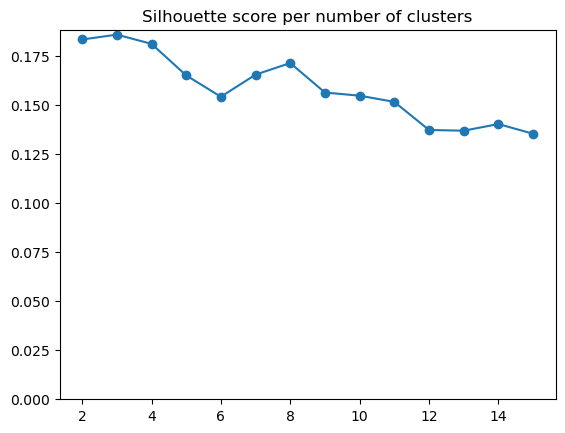

In [24]:
plt.plot([i for i in range(2,16)],list_of_silhouttes, "o-")
plt.gca().set_ylim(bottom=0)
plt.title("Silhouette score per number of clusters")

## TO DO 16

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

Given the pure silhouette score, my choice would be k=3 as it is the biggest value amongst all. At the same time tho this is quite unexpected, as we know that the dataset is divided in 10 classes and we would think k=10 as the more appropriate choice. We can also see on the other hand that none of the silhouette scores are really high, so choosing k=3 or k=10 would not make a big difference in terms of clustering quality as the results would be quite similarly bad. 

### MORE ATTEMPTS TO IMPROVE THE CLUSTERING RESULTS

*bigger dataset*

In [25]:
X = X[permutation]
y = y[permutation]

m_training = 45000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

In [26]:
#import KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init= 10, random_state=ID).fit(X_train)
#print the centroids
print(kmeans.cluster_centers_)

[[ 1.08902211e-06  2.23249533e-05  1.27415587e-04 ...  2.44937408e-02
   3.62698815e-03  2.83145749e-04]
 [-3.85399991e-20  1.32137140e-19  1.38235777e-18 ... -1.00613962e-16
  -1.21430643e-17 -7.58941521e-19]
 [-2.41404390e-20  2.69061312e-05  2.69061312e-05 ...  4.22846669e-02
   1.96196146e-02  1.30831063e-03]
 ...
 [ 7.04051818e-07  3.44985391e-05  1.77421058e-04 ...  9.59341007e-03
   2.12342028e-03  2.45010033e-04]
 [-1.52465931e-20  8.97897797e-06  1.25705692e-04 ...  3.45241703e-03
   2.52533755e-03  5.05067511e-04]
 [-3.09167026e-20  1.63189476e-05  1.63189476e-05 ...  1.50636439e-05
   1.25530366e-05  2.00577402e-18]]


In [27]:
from sklearn import metrics
#compute the contingency matrix
contingency_matrix = metrics.cluster.contingency_matrix(y_train, kmeans.labels_)
print(contingency_matrix)

[[ 126    2    0  487 2492  160   19 1143   15    0]
 [  42    0    0  115  183 4111    0   87    3    0]
 [2625    0    0  395   84    9   22 1349   21    0]
 [  31    0    0  413 1240 2410    6  376    4    0]
 [2709    0    0  202  618  121   23  835   11    0]
 [   0 1094  212 2773    1    1   10   21    3  364]
 [1458    5    1  602  779   52   13 1584   45    0]
 [   0 3506   18  384    0    0    0    0    1  643]
 [ 211  175    6  395   17   23 1825  142 1642   56]
 [   0  113 2095  140    3    2    0   33    2 2061]]


In [28]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters

list_of_silhouttes = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init= 10, random_state=ID).fit(X_train)
    silhouttescore = metrics.silhouette_score(X_train, kmeans.labels_)
    list_of_silhouttes.append(silhouttescore)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.1927969373322496
Silhoutte coefficient for number of clusters=3: 0.1872050683863869
Silhoutte coefficient for number of clusters=4: 0.1809089234725296
Silhoutte coefficient for number of clusters=5: 0.16144416105694828
Silhoutte coefficient for number of clusters=6: 0.15620010544951293
Silhoutte coefficient for number of clusters=7: 0.16524881329616548
Silhoutte coefficient for number of clusters=8: 0.15477835372450383
Silhoutte coefficient for number of clusters=9: 0.15686527670743497
Silhoutte coefficient for number of clusters=10: 0.1542457042524634
Silhoutte coefficient for number of clusters=11: 0.14077378482079406
Silhoutte coefficient for number of clusters=12: 0.1364564126383657
Silhoutte coefficient for number of clusters=13: 0.13049705688589744
Silhoutte coefficient for number of clusters=14: 0.12924526875429418
Silhoutte coefficient for number of clusters=15: 0.12486034964337367


Text(0.5, 1.0, 'Silhouette score per number of clusters')

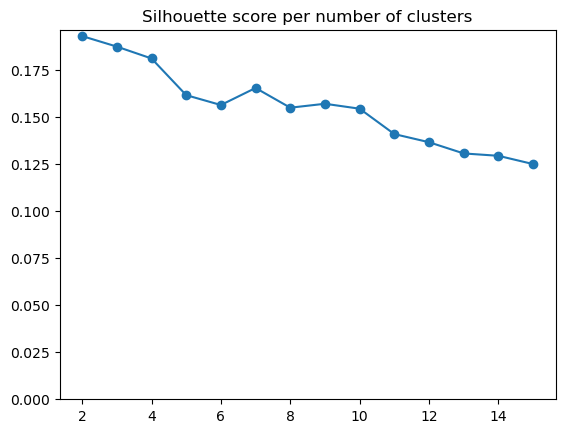

In [29]:
plt.plot([i for i in range(2,16)],list_of_silhouttes, "o-")
plt.gca().set_ylim(bottom=0)
plt.title("Silhouette score per number of clusters")

We have just a tiny, slightly upgrade with respect to the previous case, and the processing time is longer. The results are not really better, so it's not worth it to use a bigger dataset.

*more centroids*

In [30]:
X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

In [31]:
kmeans = KMeans(n_clusters=10, n_init= 100, random_state=ID).fit(X_train)
#print the centroids
print(kmeans.cluster_centers_)

[[ 1.35525272e-20 -6.77626358e-21  1.35525272e-20 ... -5.20417043e-18
   8.67361738e-19  0.00000000e+00]
 [ 1.35525272e-20  1.41572875e-05  1.13258300e-04 ...  8.66425993e-03
   1.86876195e-03  0.00000000e+00]
 [-6.77626358e-21  0.00000000e+00  0.00000000e+00 ...  1.25222816e-02
   6.72905526e-03  6.23885918e-04]
 ...
 [-3.38813179e-21  0.00000000e+00  0.00000000e+00 ...  5.20417043e-18
  -8.67361738e-19  0.00000000e+00]
 [ 2.08752703e-04  1.49109073e-04  1.49109073e-04 ...  1.17796168e-02
   1.03929024e-02  2.53485425e-04]
 [-3.38813179e-21  6.77626358e-21  1.35525272e-20 ...  6.60597572e-02
   3.75350140e-02  5.13538749e-04]]


In [32]:
contingency_matrix = metrics.cluster.contingency_matrix(y_train, kmeans.labels_)
print(contingency_matrix)

[[  6  61   3 121   1   0   8   0  15   0]
 [178   7   0   4   0   0   0   0   4   0]
 [  0  61   2   4   1   0 129   0  14   0]
 [ 79  40   1  55   0   0   0   0   8   0]
 [  6  32   1  21   2   0 113   0   5   0]
 [  0   2   0   0   1  45   0  12 143  12]
 [  1  57   7  31   1   0  61   0  23   0]
 [  0   0   0   0   0 155   0  26  29   1]
 [  0  13  74   2  83  14  12   0  14   0]
 [  1   4   0   0   0   7   0 108   8  71]]


In [33]:
list_of_silhouttes = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init= 100, random_state=ID).fit(X_train)
    silhouttescore = metrics.silhouette_score(X_train, kmeans.labels_)
    list_of_silhouttes.append(silhouttescore)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.20153049341860504
Silhoutte coefficient for number of clusters=3: 0.18059300655778224
Silhoutte coefficient for number of clusters=4: 0.172225559834954
Silhoutte coefficient for number of clusters=5: 0.15815617383298056
Silhoutte coefficient for number of clusters=6: 0.1489353126571344
Silhoutte coefficient for number of clusters=7: 0.15775913263864827
Silhoutte coefficient for number of clusters=8: 0.14728510205117215
Silhoutte coefficient for number of clusters=9: 0.14697435136105208
Silhoutte coefficient for number of clusters=10: 0.1477213823963536
Silhoutte coefficient for number of clusters=11: 0.1326175808020116
Silhoutte coefficient for number of clusters=12: 0.13264178906688154
Silhoutte coefficient for number of clusters=13: 0.13147422208724321
Silhoutte coefficient for number of clusters=14: 0.12836639581995155
Silhoutte coefficient for number of clusters=15: 0.1273778211549288


Text(0.5, 1.0, 'Silhouette score per number of clusters')

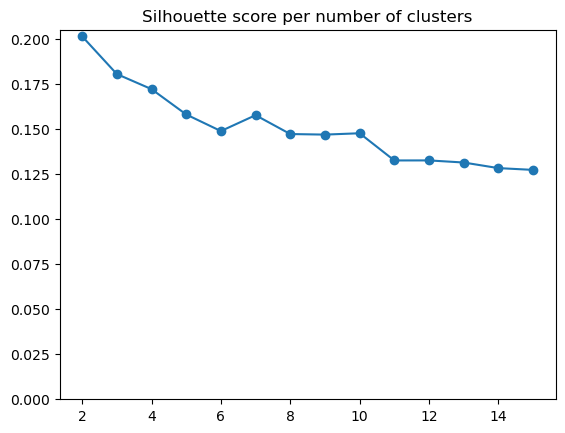

In [34]:
plt.plot([i for i in range(2,16)],list_of_silhouttes, "o-")
plt.gca().set_ylim(bottom=0)
plt.title("Silhouette score per number of clusters")

Slight improvement, and also k=10 is a local maximum. Let's see what happens if we use more centroids.

*even more centroids*

In [35]:
kmeans = KMeans(n_clusters=10, n_init= 1000, random_state=ID).fit(X_train)
#print the centroids
print(kmeans.cluster_centers_)

[[-3.38813179e-21  9.01510029e-05  0.00000000e+00 ...  4.11539328e-02
   1.43340095e-02  2.52422808e-03]
 [ 1.01643954e-20  4.80192077e-05  3.20128051e-04 ...  9.60384154e-05
  -8.67361738e-19  5.42101086e-20]
 [ 1.01643954e-20  0.00000000e+00  1.35525272e-20 ...  1.73472348e-18
   0.00000000e+00  1.08420217e-19]
 ...
 [-3.38813179e-21  6.77626358e-21  0.00000000e+00 ...  3.46944695e-18
   0.00000000e+00  0.00000000e+00]
 [-3.38813179e-21  6.77626358e-21  0.00000000e+00 ...  1.45717234e-02
   6.23323013e-03  5.77915377e-04]
 [ 2.14460784e-04  1.53186275e-04  1.53186275e-04 ...  1.04473039e-02
   1.00949755e-02  2.60416667e-04]]


In [36]:
contingency_matrix = metrics.cluster.contingency_matrix(y_train, kmeans.labels_)
print(contingency_matrix)

[[  1 123   0   0   8  67   6   0   3   7]
 [  0   4   0   0   0  13 176   0   0   0]
 [  1   6   0   0 131  63   0   0   3   7]
 [  0  57   0   0   0  46  77   0   1   2]
 [  3  21   0   0 115  29   6   0   2   4]
 [  1   0  28  11   0   3   0  12   0 160]
 [  1  32   0   0  63  62   1   0   9  13]
 [  0   0 148   1   0   0   0  25   0  37]
 [ 80   2  12   0  12  11   0   0  77  18]
 [  0   0   8  71   0   4   1 107   0   8]]


In [37]:
list_of_silhouttes = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init= 1000, random_state=ID).fit(X_train)
    silhouttescore = metrics.silhouette_score(X_train, kmeans.labels_)
    list_of_silhouttes.append(silhouttescore)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.20153049341860504
Silhoutte coefficient for number of clusters=3: 0.18059300655778224
Silhoutte coefficient for number of clusters=4: 0.17219563048361192
Silhoutte coefficient for number of clusters=5: 0.15812496283411298
Silhoutte coefficient for number of clusters=6: 0.14896644445301524
Silhoutte coefficient for number of clusters=7: 0.15771189538395694
Silhoutte coefficient for number of clusters=8: 0.14692866345402286
Silhoutte coefficient for number of clusters=9: 0.1468087203706279
Silhoutte coefficient for number of clusters=10: 0.14707347431551515
Silhoutte coefficient for number of clusters=11: 0.13459777232861583
Silhoutte coefficient for number of clusters=12: 0.13264178906688154
Silhoutte coefficient for number of clusters=13: 0.13147422208724321
Silhoutte coefficient for number of clusters=14: 0.12958540080057518
Silhoutte coefficient for number of clusters=15: 0.12886740732592097


Text(0.5, 1.0, 'Silhouette score per number of clusters')

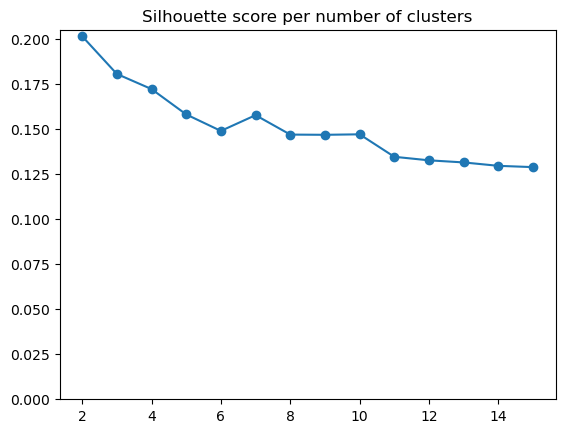

In [38]:
plt.plot([i for i in range(2,16)],list_of_silhouttes, "o-")
plt.gca().set_ylim(bottom=0)
plt.title("Silhouette score per number of clusters")

Basically same results as above. Let's now try to combine the two approaches.

*more centroids and bigger dataset*

In [39]:
X = X[permutation]
y = y[permutation]

m_training = 20000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

In [40]:
kmeans = KMeans(n_clusters=10, n_init= 2000, random_state=ID).fit(X_train)
#print the centroids
print(kmeans.cluster_centers_)

[[ 7.62329653e-21  5.08219768e-21  4.60785923e-19 ... -3.46944695e-18
   1.25767452e-17 -1.30104261e-18]
 [ 7.62329653e-21  6.02622916e-06  1.05459010e-04 ...  1.28449075e-02
   6.37273734e-03  4.15809812e-04]
 [ 1.25249717e-06  1.25249717e-05  1.08967253e-04 ...  2.50361659e-02
   3.32287498e-03  1.76602100e-04]
 ...
 [ 5.92923063e-21  8.47032947e-21  1.35525272e-19 ...  6.93889390e-18
  -1.08420217e-17 -3.79470760e-19]
 [ 2.96461532e-21  5.06662613e-06  2.83731063e-04 ...  3.48077215e-03
   1.77331915e-03  7.09327659e-05]
 [ 3.81164826e-21  4.55996352e-06  1.45918833e-04 ...  3.26584587e-02
   1.37574099e-02  1.32694938e-03]]


In [41]:
contingency_matrix = metrics.cluster.contingency_matrix(y_train, kmeans.labels_)
print(contingency_matrix)

[[  68  229   53 1144    0    1  541    0    3   12]
 [1803   50   18   77    0    0   42    0    1    0]
 [   3  182 1148   36    0    0  591    0   14   11]
 [1086  180   22  555    0    0  164    0    2    2]
 [  56   96 1180  264    0    0  359    0    7    7]
 [   1 1185    0    1   93  522    8  163    1    5]
 [  17  281  624  333    1    0  681    0   18    9]
 [   0  161    0    0   11 1578    0  264    1    0]
 [   7  181   86    6    1   89   69   34  726  814]
 [   1   56    0    1  882   73    5 1003    1    0]]


In [42]:
list_of_silhouttes = []
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init= 2000, random_state=ID).fit(X_train)
    silhouttescore = metrics.silhouette_score(X_train, kmeans.labels_)
    list_of_silhouttes.append(silhouttescore)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

Silhoutte coefficient for number of clusters=2: 0.19258848864589714
Silhoutte coefficient for number of clusters=3: 0.18749526694614557
Silhoutte coefficient for number of clusters=4: 0.17890020074292756
Silhoutte coefficient for number of clusters=5: 0.1621862961785711
Silhoutte coefficient for number of clusters=6: 0.15665395076113667
Silhoutte coefficient for number of clusters=7: 0.1656366391374209
Silhoutte coefficient for number of clusters=8: 0.15447462825940084
Silhoutte coefficient for number of clusters=9: 0.15717232737462722
Silhoutte coefficient for number of clusters=10: 0.15481383984302718
Silhoutte coefficient for number of clusters=11: 0.14915474910733473
Silhoutte coefficient for number of clusters=12: 0.13792685962117715
Silhoutte coefficient for number of clusters=13: 0.13084560338888643
Silhoutte coefficient for number of clusters=14: 0.13013822383081491
Silhoutte coefficient for number of clusters=15: 0.1255188337322459


Text(0.5, 1.0, 'Silhouette score per number of clusters')

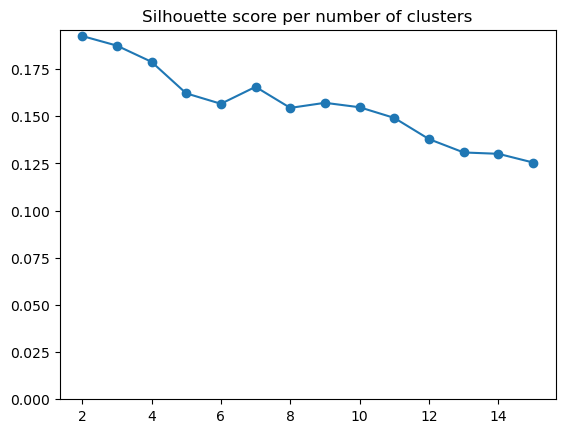

In [43]:
plt.plot([i for i in range(2,16)],list_of_silhouttes, "o-")
plt.gca().set_ylim(bottom=0)
plt.title("Silhouette score per number of clusters")

Apparently using 20000 elements in the dataset and 2000 different centroids doesn't quite reach the slightly better results of the previous case. The processing time is also EXTREMELY long, so it's DEFINITELY not worth it to use this approach.